In [1]:
import pandas as pd 
from pandas import ExcelWriter
from pandas import ExcelFile
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import plotly
import plotly.graph_objects as go
import datetime as dt
import requests
from plotly.subplots import make_subplots
import seaborn as sns
import shap 
import lime
from lime import lime_tabular
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import graphviz
from sklearn.metrics import accuracy_score
from sklearn import tree, ensemble
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import datasets
from sklearn.model_selection import KFold
from collections import defaultdict
import pprint
import os
import warnings
warnings.filterwarnings('always')
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
#Loading data set
data_frame=pd.read_csv('/Users/va/Documents/dsb/Traffic_Crashes.csv')

In [3]:
#viewing features of data set
data_frame.head()

,X,Y,OBJECTID,jurisdiction,number_of_lanes,young,deer,crash_id,lighting,occupants,...,crash_type,train,weather,property_damage,lane_departure,primary_road,alcohol,drug,elderly,fatal
0,-83.062833,42.365431,1,4.0,2,0,0,7929715,1,2,...,4,0,2,1,0,HENDRIE,0,0,0,0.0
1,-82.947141,42.442948,2,5.0,0,0,0,7931144,1,3,...,4,0,1,1,0,E STATE FAIR,0,0,0,0.0
2,-83.077551,42.349899,3,4.0,2,0,0,7854992,1,0,...,5,0,2,1,0,FOREST AVE,0,0,0,0.0
3,-83.072321,42.351541,4,4.0,2,0,0,7940235,1,3,...,8,0,1,1,0,W FOREST AVE,0,0,0,0.0
4,-83.108985,42.397008,5,1.0,1,0,0,7932532,1,1,...,1,0,5,1,1,109C,0,0,0,0.0


In [4]:
#cleaning data for feature extraction 
data_frame.dropna(inplace=True)
data_frame.shape

df_clean=data_frame.drop(['bicycle','motorcycle','a_level_count','OBJECTID','young','deer','number_of_units','school_bus','weekday','c_level_count','jurisdiction','highway_classification','train','lane_departure','crash_id','primary_road','intersecting_road','datetime','dis_ctrl_i','pedestrian','b_level_count'],axis=1)
df_clean.dropna(inplace=True)
df_clean.head()
df_clean.info()
df_data = df_clean.iloc[:,0:17]
df_target= df_clean['fatal'].astype(int)
df_data.head()
df_target.head()

#Creating test and train data sets for feature improtance
X=df_data
y=df_target
X_train, X_test, Y_train, Y_test = train_test_split(df_data[::], 
                                                    df_target, random_state=10)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125057 entries, 0 to 135542
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   X                   125057 non-null  float64
 1   Y                   125057 non-null  float64
 2   number_of_lanes     125057 non-null  int64  
 3   lighting            125057 non-null  int64  
 4   occupants           125057 non-null  int64  
 5   road_condition      125057 non-null  int64  
 6   speed_limit         125057 non-null  int64  
 7   hour                125057 non-null  float64
 8   hit_and_run         125057 non-null  int64  
 9   most_severe_injury  125057 non-null  int64  
 10  red_light_running   125057 non-null  int64  
 11  crash_type          125057 non-null  int64  
 12  weather             125057 non-null  int64  
 13  property_damage     125057 non-null  int64  
 14  alcohol             125057 non-null  int64  
 15  drug                125057 non-nul

In [5]:
#Feature importance using Lime
import warnings
warnings.filterwarnings('ignore')
lime_row = X_test.iloc[1222]
import lime
from lime import lime_tabular
from sklearn.inspection import permutation_importance
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


rf_model= RandomForestClassifier(n_estimators=20)
rf_model.fit(X, y)
lime_explainer = lime_tabular.LimeTabularExplainer(training_data=np.array(X_train),
feature_names=X_train.columns, class_names=[1, 0],mode='classification' )
lime_exp = lime_explainer.explain_instance(data_row=lime_row,predict_fn=rf_model.predict_proba ) 
lime_exp.show_in_notebook(show_table=True)


In [ ]:
#Feature importance using Shap
import warnings
warnings.filterwarnings('ignore')
import shap 
lime_row1 = X_test.iloc[29]
#print(test_1)
shap.initjs()
shap_explainer = shap.TreeExplainer(rf_model) 
shap_values = shap_explainer.shap_values(X)
a=shap_values[1][0]
#print(shap_values[1][0])
#print(shap_explainer.expected_value[0])
shap.force_plot(shap_explainer.expected_value[0], a,lime_row1)

In [ ]:
shap.summary_plot(shap_values, X)

In [6]:
#Processing dataset based on feature importance and model selection
df_clean=data_frame.drop(['bicycle','motorcycle','a_level_count','OBJECTID','young','deer','number_of_units','school_bus','weekday','c_level_count','jurisdiction','highway_classification','train','lane_departure','crash_id','primary_road','intersecting_road','datetime','dis_ctrl_i','pedestrian','b_level_count'],axis=1)
df_clean.dropna(inplace=True)
df_clean.head()
df_clean.info()
df_data = df_clean.iloc[:,0:17]
df_target= df_clean['fatal'].astype(int)
df_data.head()
df_target.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 125057 entries, 0 to 135542
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   X                   125057 non-null  float64
 1   Y                   125057 non-null  float64
 2   number_of_lanes     125057 non-null  int64  
 3   lighting            125057 non-null  int64  
 4   occupants           125057 non-null  int64  
 5   road_condition      125057 non-null  int64  
 6   speed_limit         125057 non-null  int64  
 7   hour                125057 non-null  float64
 8   hit_and_run         125057 non-null  int64  
 9   most_severe_injury  125057 non-null  int64  
 10  red_light_running   125057 non-null  int64  
 11  crash_type          125057 non-null  int64  
 12  weather             125057 non-null  int64  
 13  property_damage     125057 non-null  int64  
 14  alcohol             125057 non-null  int64  
 15  drug                125057 non-nul

0    0
1    0
2    0
3    0
4    0
Name: fatal, dtype: int64

In [7]:
#Creating test and train data sets
#removing class imbalnces in the data set using SMOTE
X=df_data
y=df_target
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
oversample.fit_resample(X,y)
X_train, X_test, Y_train, Y_test = train_test_split(df_data[::], 
                                                    df_target, test_size=0.2, random_state=0)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100045 entries, 124657 to 68273
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   X                   100045 non-null  float64
 1   Y                   100045 non-null  float64
 2   number_of_lanes     100045 non-null  int64  
 3   lighting            100045 non-null  int64  
 4   occupants           100045 non-null  int64  
 5   road_condition      100045 non-null  int64  
 6   speed_limit         100045 non-null  int64  
 7   hour                100045 non-null  float64
 8   hit_and_run         100045 non-null  int64  
 9   most_severe_injury  100045 non-null  int64  
 10  red_light_running   100045 non-null  int64  
 11  crash_type          100045 non-null  int64  
 12  weather             100045 non-null  int64  
 13  property_damage     100045 non-null  int64  
 14  alcohol             100045 non-null  int64  
 15  drug                100045 non

In [8]:
#list of dept of a tree
max_depth_list = [1,2,4,6,8,10]

train_errors = [] # Log training errors for each model
test_errors = [] # Log testing errors for each model

#Creating list parameters fn,cn for passing to plot_tree model
fn=['X', 'Y', 'number_of_lanes', 'lighting',
       'occupants', 'road_condition', 'speed_limit',
       'hour', 'hit_and_run', ' most_severe_injury',
       'red_light_running', 'crash_type ', 'weather', 'property_damage',
       'alcohol', 'drug', 'elderly']
cn=['0', '1']



max_depth 1
[[24890     0]
 [  122     0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24890
           1       0.00      0.00      0.00       122

    accuracy                           1.00     25012
   macro avg       0.50      0.50      0.50     25012
weighted avg       0.99      1.00      0.99     25012

max_depth 2
[[24890     0]
 [  122     0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24890
           1       0.00      0.00      0.00       122

    accuracy                           1.00     25012
   macro avg       0.50      0.50      0.50     25012
weighted avg       0.99      1.00      0.99     25012

max_depth 4
[[24888     2]
 [  114     8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24890
           1       0.80      0.07      0.12       122

    accuracy                           1.00     25012

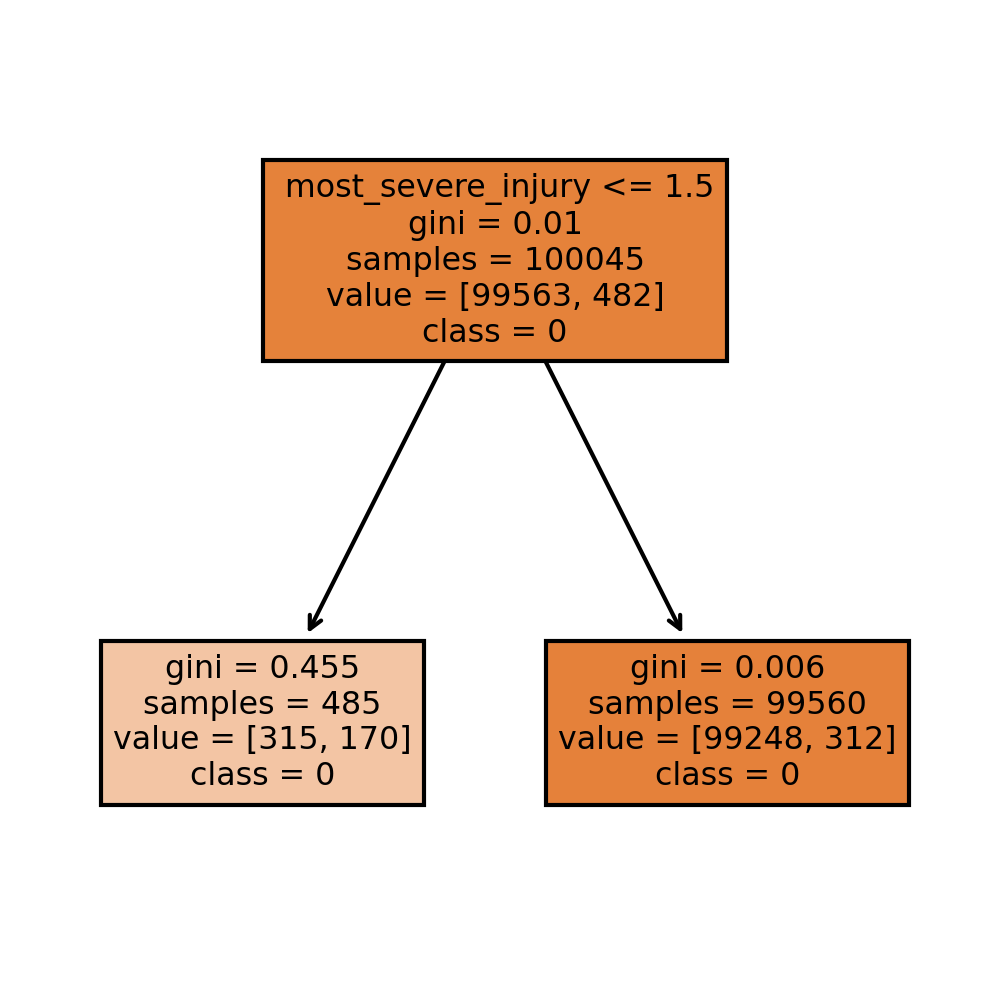

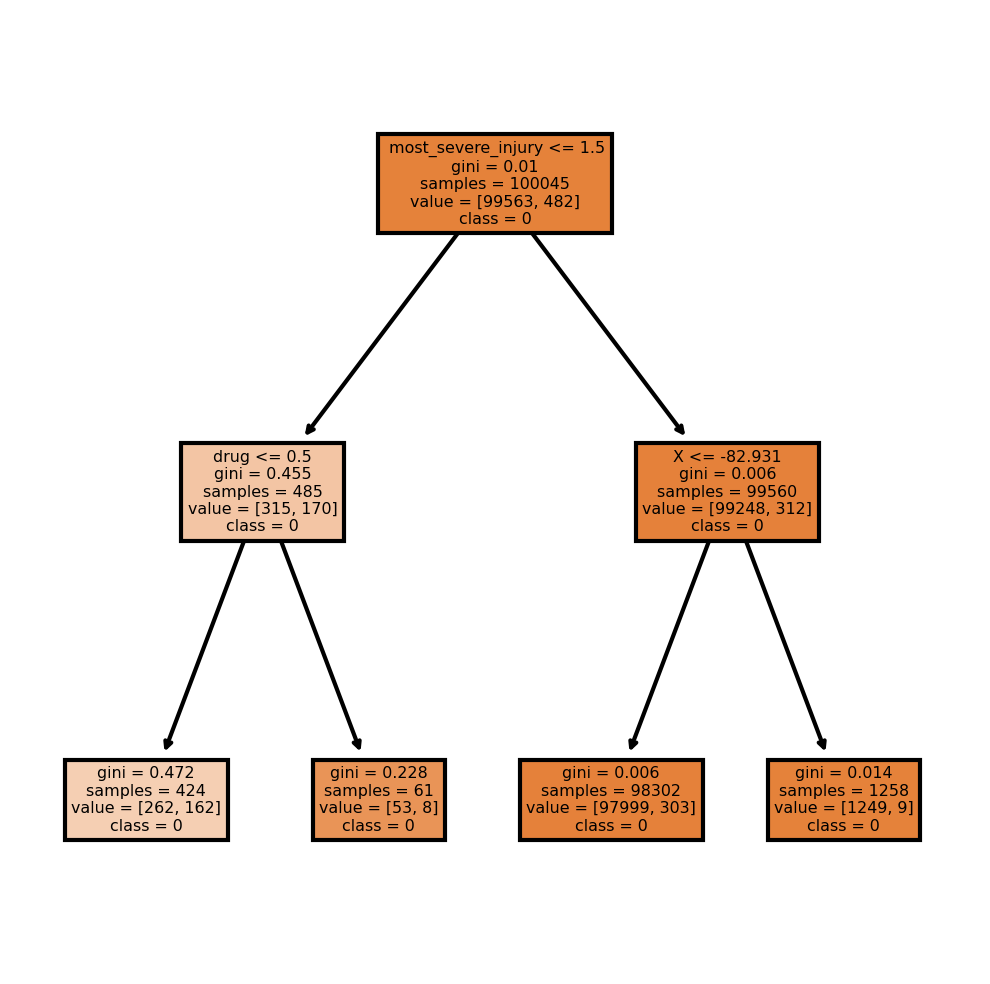

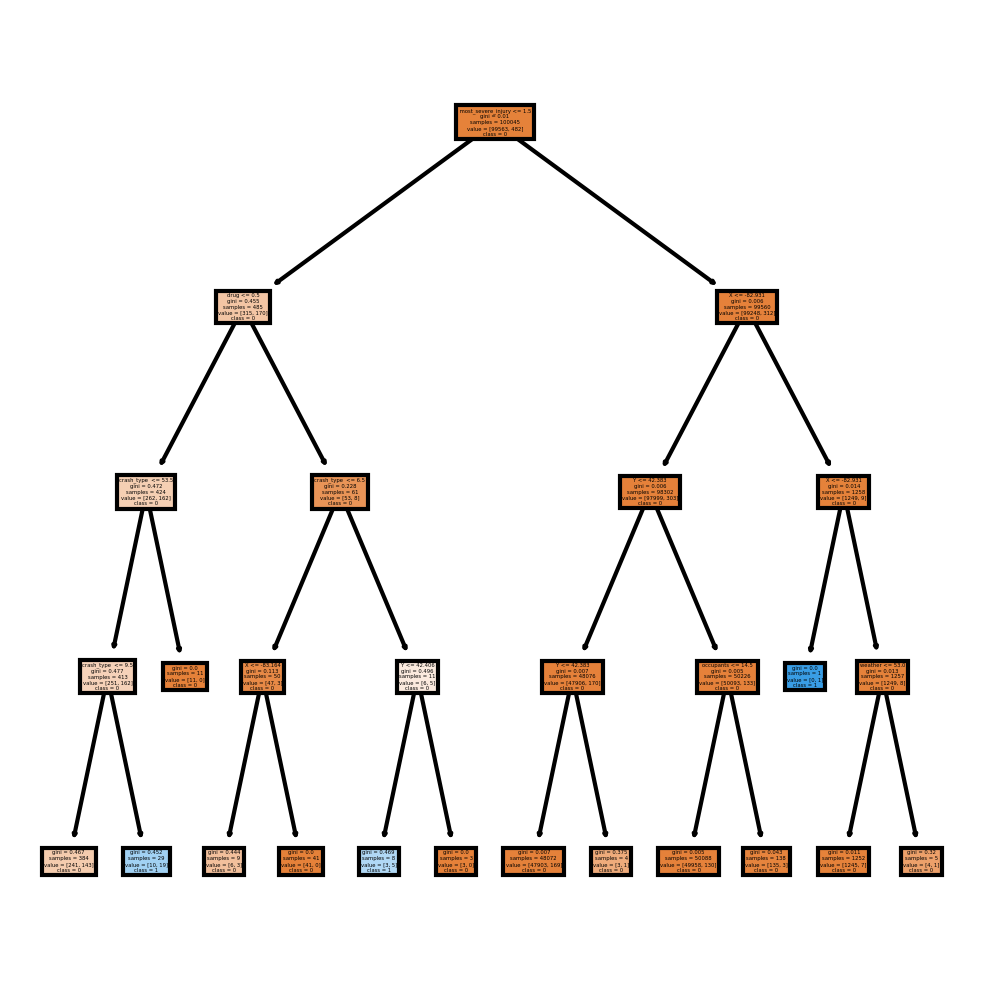

In [9]:
# Created Single Decision Tree 
#Here I Train,test and plot the single tree with diffrent depths
import warnings
warnings.filterwarnings('ignore')
max_depth_list = [1,2,4]
for x in max_depth_list:
    clf = DecisionTreeClassifier(max_depth=x) 
    clf.fit(X_train,Y_train)
    #z_train = dtc.predict(X_train)
    z_test = clf.predict(X_test)
    print('max_depth',x)
    print(confusion_matrix(Y_test, z_test))
    print(classification_report(Y_test, z_test))
    fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
    tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')
print('From the depth of four the accuracy started decresing')
print('the most influenced features are severe_injury,drug,crash_type') 

In [10]:
# Created a XGBoost Model for classification
#Here I Trained ,tested the XGBoost model with diffrent depths on same traffic dataset

from sklearn.ensemble import GradientBoostingClassifier
max_depth_list = [1,2,4,8]
for x in max_depth_list:
    clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, 
                                     max_depth=x, random_state=0) 
    warnings.filterwarnings('ignore')
    clf.fit(X_train,Y_train)
    #z_train = dtc.predict(X_train)
    z_test = clf.predict(X_test)
    print('max_depth',x)
    print(confusion_matrix(Y_test, z_test))
    print(classification_report(Y_test, z_test))
    score = clf.score(X_test, Y_test)
    print(score)
print('XGBoost showed best accuracy with this class imblance data set than normal decisson tree')

max_depth 1
[[24804    86]
 [   81    41]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24890
           1       0.32      0.34      0.33       122

    accuracy                           0.99     25012
   macro avg       0.66      0.67      0.66     25012
weighted avg       0.99      0.99      0.99     25012

0.9933232048616664
max_depth 2
[[24820    70]
 [   83    39]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24890
           1       0.36      0.32      0.34       122

    accuracy                           0.99     25012
   macro avg       0.68      0.66      0.67     25012
weighted avg       0.99      0.99      0.99     25012

0.9938829361906285
max_depth 4
[[24443   447]
 [   80    42]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     24890
           1       0.09      0.34      0.14       122

    accuracy   